In [1]:
import numpy as np
import matplotlib.pyplot as plt

MAX_CARS = 20  # Maximum number of cars at each location
MAX_MOVE = 5  # Maximum number of cars that can be moved in one night
RENTAL_COST = 10  # Revenue per car rented
MOVE_COST = 2  # Cost per car moved
ADDITIONAL_PARKING_COST = 4  # Additional cost for extra parking
DISCOUNT_FACTOR = 0.9  # Discount factor for future rewards

#### Define reward function with the new constraints


In [2]:
def reward(state, action):
    reward = 0
    cars_moved = abs(action)
    cars_left_first_loc = min(state[0] - cars_moved, MAX_CARS)
    cars_left_second_loc = min(state[1] + cars_moved, MAX_CARS)

    # Rental rewards
    reward += RENTAL_COST * (min(state[0], cars_moved) + min(state[1], cars_moved))

    # Additional parking costs
    if cars_left_first_loc > 10:
        reward -= ADDITIONAL_PARKING_COST
    if cars_left_second_loc > 10:
        reward -= ADDITIONAL_PARKING_COST

    # Moving costs
    reward -= MOVE_COST * cars_moved

    return reward

#### Transition Probability

In [3]:
def transition_probability(state, action):
    P = np.zeros((MAX_CARS + 1, MAX_CARS + 1))
    cars_moved = abs(action)
    for cars_rented_first_loc in range(MAX_CARS + 1):
        for cars_rented_second_loc in range(MAX_CARS + 1):
            cars_left_first_loc = min(state[0] - cars_moved + cars_rented_first_loc, MAX_CARS)
            cars_left_second_loc = min(state[1] + cars_moved + cars_rented_second_loc, MAX_CARS)
            P[cars_left_first_loc, cars_left_second_loc] += (1 / ((MAX_CARS + 1) ** 2))
    return P

#### Policy Evaluation

In [4]:
def policy_evaluation(policy, value_function, iterations=100, threshold=1e-8):
    for _ in range(iterations):
        new_value_function = np.zeros((MAX_CARS + 1, MAX_CARS + 1))
        for cars_first_loc in range(MAX_CARS + 1):
            for cars_second_loc in range(MAX_CARS + 1):
                action = policy[cars_first_loc, cars_second_loc]
                transition_probs = transition_probability((cars_first_loc, cars_second_loc), action)
                rewards = reward((cars_first_loc, cars_second_loc), action)
                new_value_function[cars_first_loc, cars_second_loc] = np.sum(
                    transition_probs * (rewards + DISCOUNT_FACTOR * value_function))
        change = np.abs(new_value_function - value_function).max()
        value_function = new_value_function
        if change < threshold:
            break
    return value_function

#### Policy Improvement

In [5]:
def policy_improvement(value_function):
    policy = np.zeros((MAX_CARS + 1, MAX_CARS + 1), dtype=int)
    for cars_first_loc in range(MAX_CARS + 1):
        for cars_second_loc in range(MAX_CARS + 1):
            best_action = 0
            best_value = -float('inf')
            for action in range(-MAX_MOVE, MAX_MOVE + 1):
                if (action >= 0 and action <= cars_first_loc) or (action < 0 and abs(action) <= cars_second_loc):
                    transition_probs = transition_probability((cars_first_loc, cars_second_loc), action)
                    rewards = reward((cars_first_loc, cars_second_loc), action)
                    expected_value = np.sum(transition_probs * (rewards + DISCOUNT_FACTOR * value_function))
                    if expected_value > best_value:
                        best_value = expected_value
                        best_action = action
            policy[cars_first_loc, cars_second_loc] = best_action
    return policy

#### Policy Iteration

In [6]:
value_function = np.zeros((MAX_CARS + 1, MAX_CARS + 1))
policy_stable = False
iterations = 0
while not policy_stable:
    iterations += 1
    old_policy = policy_improvement(value_function)
    new_value_function = policy_evaluation(old_policy, value_function)
    new_policy = policy_improvement(new_value_function)
    if np.array_equal(old_policy, new_policy):
        policy_stable = True
    value_function = new_value_function

print("Number of iterations:", iterations)
print("\nOptimal Policy:")
print(new_policy)

Number of iterations: 1

Optimal Policy:
[[ 0 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 1 -1 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 2  2 -2 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 3  3  3 -3 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 4  4  4  4 -4 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 5  5  5  5  5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 5  5  5  5  5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 5  5  5  5  5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 5  5  5  5  5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 5  5  5  5  5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 5  5  5  5  5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 5  5  5  5  5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 5  5  5  5  5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 5  5  5  5  5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [ 5  5  5  5  5 -5 -5 -5 -5 -5 -5 

#### Visualize the optimal policy


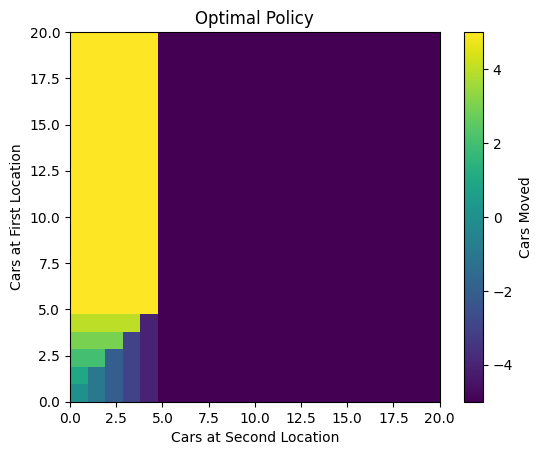

In [7]:
plt.imshow(new_policy, origin='lower', cmap='viridis', extent=[0, MAX_CARS, 0, MAX_CARS])
plt.colorbar(label='Cars Moved')
plt.xlabel('Cars at Second Location')
plt.ylabel('Cars at First Location')
plt.title('Optimal Policy')
plt.show()